# Loading word embeddings

In [36]:
import io
import numpy as np

In [37]:
def load_vec(emb_path, nmax=50000):
    vectors = []
    word2id = {}
    with io.open(emb_path, 'r', encoding='utf-8', newline='\n', errors='ignore') as f:
        next(f)
        for i, line in enumerate(f):
            word, vect = line.rstrip().split(' ', 1)
            vect = np.fromstring(vect, sep=' ')
            assert word not in word2id, 'word found twice'
            vectors.append(vect)
            word2id[word] = len(word2id)
            if len(word2id) == nmax:
                break
    id2word = {v: k for k, v in word2id.items()}
    embeddings = np.vstack(vectors)
    return embeddings, id2word, word2id

In [38]:
src_path = '/Users/jadisy/Documents/GitHub/MUSE/dumped/debug/zn4rhg9ogh/vectors-en.txt'
tgt_path = '/Users/jadisy/Documents/GitHub/MUSE/dumped/debug/zn4rhg9ogh/vectors-zh.txt'
nmax = 50000  # maximum number of word embeddings to load

src_embeddings, src_id2word, src_word2id = load_vec(src_path, nmax)
print("Loaded %i lines from src_embeddings." % len(src_embeddings))
tgt_embeddings, tgt_id2word, tgt_word2id = load_vec(tgt_path, nmax)
print("Loaded %i lines from tgt_embeddings." % len(tgt_embeddings))

Loaded 365 lines from src_embeddings.
Loaded 360 lines from tgt_embeddings.


In [48]:
# Import our sentence file
en_sent = "./an_enzh/train.tok.tc.en"
zh_sent = "./an_enzh/train.tok.tc.zh"

english_sentences = []
chinese_sentences = []
number_sample = 500

import io
with io.open(en_sent, 'r', encoding='utf-8', newline='\n', errors='ignore') as f:
    for i, line in enumerate(f):
#         english_sentences.append(line[:-1].replace(' ',''))
        english_sentences.append(line[:-1].replace(' ','_'))
        if i == number_sample - 1: #sample lines
            break;
            
print("Loaded %i lines from en_sent." % len(english_sentences))

with io.open(zh_sent, 'r', encoding='utf-8', newline='\n', errors='ignore') as f:
    for i, line in enumerate(f):
#         chinese_sentences.append(line[:-1].replace(' ',''))
        chinese_sentences.append(line[:-1].replace(' ','_'))
        if i == number_sample - 1: #sample lines
            break;
        
print("Loaded %i lines from zh_sent." % len(chinese_sentences))

Loaded 500 lines from en_sent.
Loaded 500 lines from zh_sent.


In [49]:
# find original data records
orig_src_id = [i for i, item in enumerate(src_word2id.keys()) if item in set(english_sentences)] 
orig_tgt_id = [i for i, item in enumerate(tgt_word2id.keys()) if item in set(chinese_sentences)]

In [61]:
# find artificial data records
arti_src_id = [i for i, item in enumerate(src_word2id.keys()) if item not in set(english_sentences)] 
arti_tgt_id = [i for i, item in enumerate(tgt_word2id.keys()) if item not in set(chinese_sentences)]

In [70]:
# calculate distance

distance = []
srcword2distance = {}
tgtword2distance = {}
for i in range(min(len(src_embeddings), len(tgt_embeddings))):
    distance.append(np.linalg.norm(src_embeddings[i]-tgt_embeddings[i]))
    srcword2distance[src_id2word[i]] = distance[i]
    tgtword2distance[tgt_id2word[i]] = distance[i]
print("Loaded %i pairs from distance." % len(distance))

Loaded 360 pairs from distance.


In [65]:
# filter out GOOD translation
orig_distance = []

print('----> filter out GOOD translation <----\n\n')
for i, line in enumerate(orig_src_id):
    if line < min(len(src_embeddings), len(tgt_embeddings)): #???
        orig_distance.append(distance[line])
        print(src_id2word[line])
        print(tgt_id2word[line]+'\n')

print("Loaded %i lines from orig_distance." % len(orig_distance))

----> filter out GOOD translation <----


(_incorporated_in_the_Cayman_Islands_with_limited_liability_)
(_於_開曼_群島_註冊_成立_之_有限公司_)

(_Stock_code_:_974_)
（_股份_代號_：_974_)

the_Board_announces_the_following_re-designation_of_Directors_with_effect_from_13_September_2017_:
董事會_宣佈_，_下列_董事_的_調任_將自_2017_年_9_月_13_日起_生效_：

(_1_)_Mr._Wu_Limin_,_an_executive_Director_,_will_be_re-designated_as_a_non-executive_Director_;_and
(_1_)_執行_董事_武_利民_先生_將_調任_為_非_執行_董事_；_及

(_2_)_Mr._Han_Wei_,_a_non-executive_Director_,_will_be_re-designated_as_an_executive_Director_.
(_2_)_非_執行_董事_韓瑋_先生_將_調任_為_執行_董事_。

appointment_OF_chief_EXECUTIVE_OFFICER_,_chief_FINANCIAL_OFFICER_AND_chief_innovation_AND_INVESTMENT_OFFICER
委任_行政_總裁_、_首席_財務總監_及_創投_總監

the_Board_announces_that_with_effect_from_13_September_2017_:
董事會_宣佈_，_自_2017_年_9_月_13_日起_：

(_1_)_Mr._Li_Zhongxu_,_an_executive_Director_,_has_been_appointed_as_the_chief_executive_officer_of_the_Company_;
(_1_)_執行_董事_李仲煦_先生_已獲_委任_為本_公司_行政_總裁_；

(_3_)_Mr._Feng_Hengyuan_has_be

In [66]:
# filter out BAD translation
arti_distance = []

print('\n'+'----> filter out BAD translation <----\n\n')
for i, line in enumerate(arti_src_id):
    if line < min(len(src_embeddings), len(tgt_embeddings), len(distance)): #???
        arti_distance.append(distance[line])
        print(src_id2word[line])
        print(tgt_id2word[line]+'\n')

print("Loaded %i lines from arti_distance." % len(arti_distance))


----> filter out BAD translation <----


(_incorporated_in
(_於_開曼_群島

(
（

the_Board_announces_the_following_re-designation_of_Directors_with_effect_from_13_September
董事會_宣佈

(_1_)
(_1_)_執行_董事_武_利民

(_2_)
(_2_)_非_執行_董事_韓瑋_先生_將_調任

appointment_OF
委任_行政

the_Board_announces_that_with_effect_from
(_1_)_執行_董事_李仲煦_先生_已獲

(_1_)_Mr._Li_Zhongxu_,_an_executive_Director_,_has
(_3_)

change_OF_composition_OF_THE_AUDIT
審核_委員會_組成

(_1_)_Mr._Wu_Limin_(_“_Mr._Wu_”_)_,_an_executive_Director_,_will_be
(

(_2_)_Mr._Han_Wei_(_“_Mr._Han_”_)_,_a_non-executive_Director_,_will_be_re-designated_as_an
(_2_)_非_執行_董事_韓瑋_先生_（_「_韓先生

Mr._Wu_,_aged_57_,_was_appointed_as_an_executive_Director_on_10_June_2017
武_先生_，_57_歲_，_於_2017_年_6_月_10_日獲_委任_為

he_holds_a_Master_’_s_degree_in_Computer_Software_from_South_Dakota
彼_持有_美國_南達科他州

Mr._Wu_will_not_receive
武

Mr._Han_will_not_receive_any_remuneration_as_an_executive
韓先生_將_不會_就_出任_執行_董事_收取

(_1_)_Mr._Li_Zhongxu_(_“_Mr._Li_”_)_,_an_executive_Director_,_has_been_appointed_

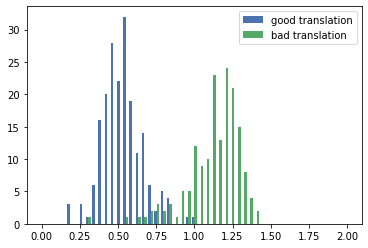

In [69]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')
bins = np.linspace(0, 2)

plt.hist([orig_distance, arti_distance], bins, label=['good translation', 'bad translation'])
plt.legend(loc='upper right')
plt.show()

# Get nearest neighbors

In [71]:
# get_nn
K = min(len(src_embeddings), len(tgt_embeddings))
word2id = {v: k for k, v in src_id2word.items()}
word_emb = src_embeddings[word2id[src_id2word[4]]]
scores = (tgt_embeddings / np.linalg.norm(tgt_embeddings, 2, 1)[:, None]).dot(word_emb / np.linalg.norm(word_emb))
k_best = scores.argsort()[-K:][::-1]
for i, idx in enumerate(k_best):
    print('%.4f - %s' % (scores[idx], tgt_id2word[idx]))

0.8639 - (_2_)_非_執行_董事_韓瑋_先生_將_調任_為_執行_董事_。
0.8423 - (_2_)_非_執行_董事_韓瑋_先生_（_「_韓先生_」_）_將_調任_為_執行_董事_。
0.7583 - (_2_)_非_執行_董事_韓瑋_先生_將_調任
0.6625 - (_2_)_執行_董事_武先_生於_調任_為_非_執行_董事_後_已_獲_委任_為_審核_委員會_成員_。
0.6545 - (_2_)_非_執行_董事_韓瑋_先生_（_「_韓先生
0.6369 - (_1_)_執行_董事_武_利民_先生_將_調任_為_非_執行_董事_；_及
0.6228 - (_1_)_執行_董事_武_利民_先生_（_「_武_先生_」_）_將_調任_為_非_執行_董事_；_及
0.5784 - (_2_)_執行_董事_武先_生於_調任_為_非_執行_董事_後_已_獲_委任_為_審核_委員會_成員
0.5775 - (_1_)_執行_董事_李仲煦_先生_已獲_委任_為本_公司_行政_總裁_；
0.5525 - (_1_)_執行_董事_李仲煦_先生_（_「_李先生_」_）_已獲_委任_為本_公司_行政_總裁_；
0.4516 - (_1_)_執行_董事_武_利民
0.4449 - (_1_)_執行_董事_李仲煦_先生_已獲
0.4331 - 8_._張建強_先生_（_「_張_先生_」_）_已辭_任非_執行_董事_；
0.4014 - 韓先生_將_不會_就_出任_執行_董事_收取_任何_薪酬_。
0.4014 - (_1_)_執行_董事
0.3924 - (_3_)_馮_恒源_先生_（_「_馮先生_」_）_已獲_委任_為本_公司_創投_總監_。
0.3854 - a_._陳_平_先生_已辭任_董事會_董事長_（_「_董事長_」_）_；
0.3849 - (_3_)_馮_恒源_先生_已獲_委任_為本_公司_創投_總監_。
0.3587 - c_._陳_平_先生_已獲_委任_為_董事會_副董事長_（_「_副董事長_」_）_；
0.3439 - 韓先生_將_不會_就_出任_執行_董事_收取
0.3425 - 2_._孟瑩_小姐_（_「_孟_小姐_」_）_已獲_委任_為本_公司_執行_董事_及_合規_主任_；
0.3376 - a_._謝_建平_先生_及_王力軍_先生_已辭_任本

In [72]:
def get_nn(word, src_emb, src_id2word, tgt_emb, tgt_id2word, K=5):
    print("Nearest neighbors of \"%s\":" % word)
    word2id = {v: k for k, v in src_id2word.items()}
    word_emb = src_emb[word2id[word]]
    scores = (tgt_emb / np.linalg.norm(tgt_emb, 2, 1)[:, None]).dot(word_emb / np.linalg.norm(word_emb))
    k_best = scores.argsort()[-K:][::-1]
    for i, idx in enumerate(k_best):
        print('%.4f - %s' % (scores[idx], tgt_id2word[idx]))

In [73]:
# printing nearest neighbors in the source space
src_word = src_id2word[4]
get_nn(src_word, src_embeddings, src_id2word, src_embeddings, src_id2word, K=5)

Nearest neighbors of "(_2_)_Mr._Han_Wei_,_a_non-executive_Director_,_will_be_re-designated_as_an_executive_Director_.":
1.0000 - (_2_)_Mr._Han_Wei_,_a_non-executive_Director_,_will_be_re-designated_as_an_executive_Director_.
0.9598 - (_2_)_Mr._Han_Wei_(_“_Mr._Han_”_)_,_a_non-executive_Director_,_will_be_re-designated_as_an_executive_Director_.
0.8927 - (_2_)_Mr._Han_Wei_(_“_Mr._Han_”_)_,_a_non-executive_Director_,_will_be_re-designated_as_an
0.7462 - (_1_)_Mr._Wu_Limin_,_an_executive_Director_,_will_be_re-designated_as_a_non-executive_Director_;_and
0.6997 - (_1_)_Mr._Wu_Limin_(_“_Mr._Wu_”_)_,_an_executive_Director_,_will_be_re-designated_as_a_non-executive_Director_;_and


In [74]:
# printing nearest neighbors in the target space
src_word = src_id2word[4]
get_nn(src_word, src_embeddings, src_id2word, tgt_embeddings, tgt_id2word, K=5)

Nearest neighbors of "(_2_)_Mr._Han_Wei_,_a_non-executive_Director_,_will_be_re-designated_as_an_executive_Director_.":
0.8639 - (_2_)_非_執行_董事_韓瑋_先生_將_調任_為_執行_董事_。
0.8423 - (_2_)_非_執行_董事_韓瑋_先生_（_「_韓先生_」_）_將_調任_為_執行_董事_。
0.7583 - (_2_)_非_執行_董事_韓瑋_先生_將_調任
0.6625 - (_2_)_執行_董事_武先_生於_調任_為_非_執行_董事_後_已_獲_委任_為_審核_委員會_成員_。
0.6545 - (_2_)_非_執行_董事_韓瑋_先生_（_「_韓先生


# Visualize multilingual embeddings

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, whiten=True)  # TSNE(n_components=2, n_iter=3000, verbose=2)
pca.fit(np.vstack([src_embeddings, tgt_embeddings]))
print('Variance explained: %.2f' % pca.explained_variance_ratio_.sum())

Variance explained: 0.24


In [13]:
import matplotlib.pyplot as plt


def plot_similar_word(src_words, src_word2id, src_emb, tgt_words, tgt_word2id, tgt_emb, pca):

    Y = []
    word_labels = []
    for sw in src_words:
        Y.append(src_emb[src_word2id[sw]])
        word_labels.append(sw)
    for tw in tgt_words:
        Y.append(tgt_emb[tgt_word2id[tw]])
        word_labels.append(tw)

    # find tsne coords for 2 dimensions
    Y = pca.transform(Y)
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]

    # display scatter plot
    plt.figure(figsize=(10, 8), dpi=80)
    plt.scatter(x_coords, y_coords, marker='x')

    for k, (label, x, y) in enumerate(zip(word_labels, x_coords, y_coords)):
        color = 'blue' if k < len(src_words) else 'red'  # src words in blue / tgt words in red
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points', fontsize=19,
                     color=color, weight='bold')

    plt.xlim(x_coords.min() - 0.2, x_coords.max() + 0.2)
    plt.ylim(y_coords.min() - 0.2, y_coords.max() + 0.2)
    plt.title('Visualization of the multilingual word embedding space')

    plt.show()

In [14]:
# get 5 random input words
src_words = ['university', 'love', 'history', 'tennis', 'research', 'conference']
tgt_words = ['universidad', 'amor', 'historia', u'tenis',  u'investigación', 'conferencia']

# assert words in dictionaries
for sw in src_words:
    assert sw in src_word2id, '"%s" not in source dictionary' % sw
for tw in tgt_words:
    assert tw in tgt_word2id, '"%s" not in target dictionary' % sw

plot_similar_word(src_words, src_word2id, src_embeddings, tgt_words, tgt_word2id, tgt_embeddings, pca)

AssertionError: "university" not in source dictionary